In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/sierra-leone.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/sierra-leone.csv'

In [3]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
df[z_scores > 3] = np.nan  # flag outliers as NaN

# fill missing and outlier values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


ValueError: Array conditional must be same shape as self

In [7]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
df[z_scores > 3] = np.nan  # flag outliers as NaN

# fill missing and outlier values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

ValueError: Array conditional must be same shape as self

In [8]:
from scipy import stats
import numpy as np

numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores only for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# Flag outliers (|Z| > 3) as NaN **only within those columns**
for i, col in enumerate(numeric_cols):
    df.loc[z_scores[:, i] > 3, col] = np.nan

# Fill missing and outlier values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


C:\Users\Admin\Desktop\kifiya-tasks\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


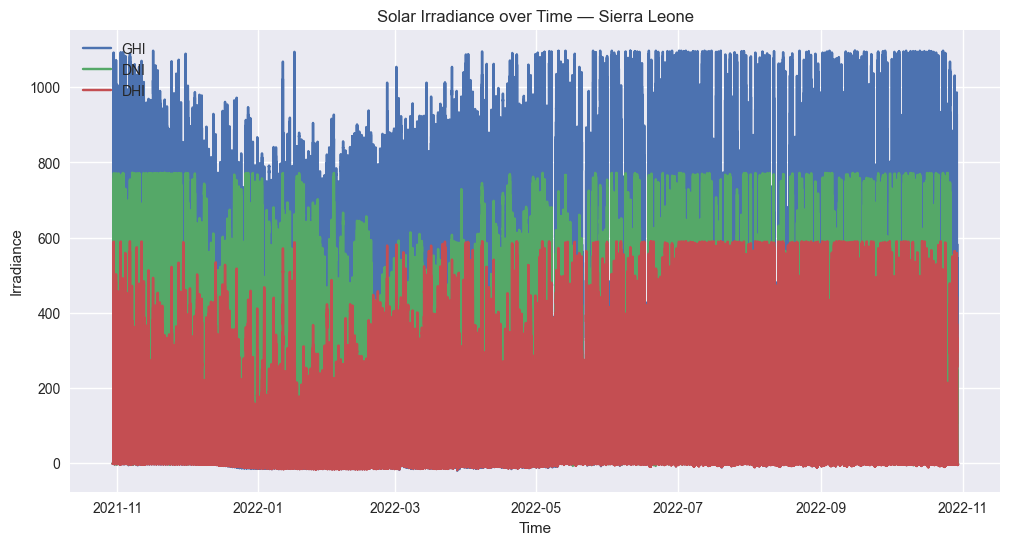

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.xlabel("Time")
plt.ylabel("Irradiance")
plt.title("Solar Irradiance over Time — Sierra Leone")
plt.legend()
plt.show()


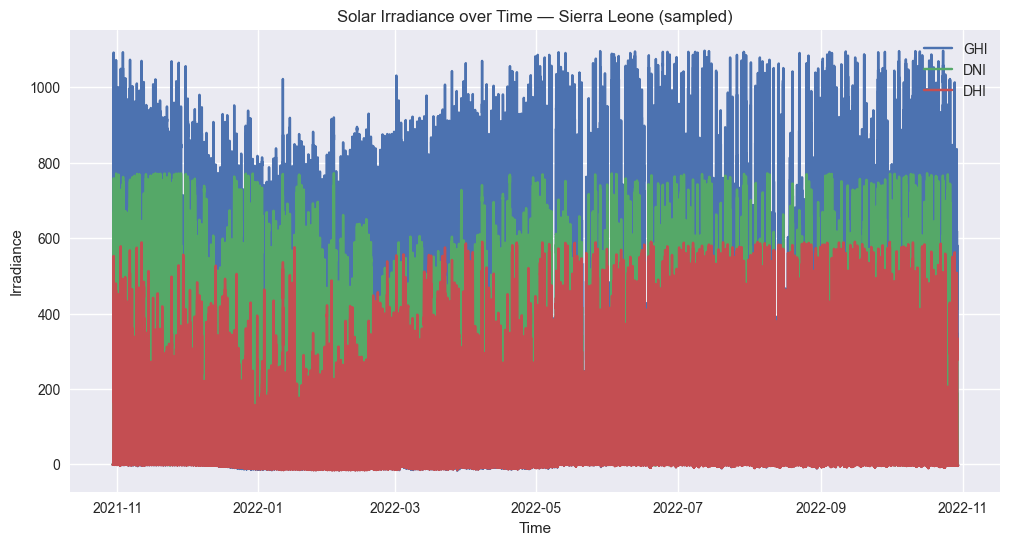

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Optional: downsample if your dataset is very large
df_sample = df.iloc[::10, :]  # take every 10th row

plt.figure(figsize=(12,6))
plt.plot(df_sample['Timestamp'], df_sample['GHI'], label='GHI')
plt.plot(df_sample['Timestamp'], df_sample['DNI'], label='DNI')
plt.plot(df_sample['Timestamp'], df_sample['DHI'], label='DHI')
plt.xlabel("Time")
plt.ylabel("Irradiance")
plt.title("Solar Irradiance over Time — Sierra Leone (sampled)")
plt.legend(loc='upper right')  # fix legend position
plt.show()


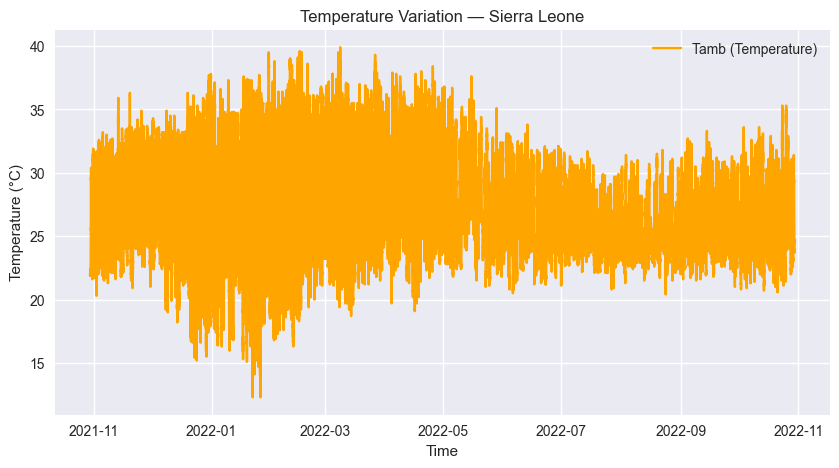

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb (Temperature)', color='orange')
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.title("Temperature Variation — Sierra Leone")
plt.legend()
plt.show()


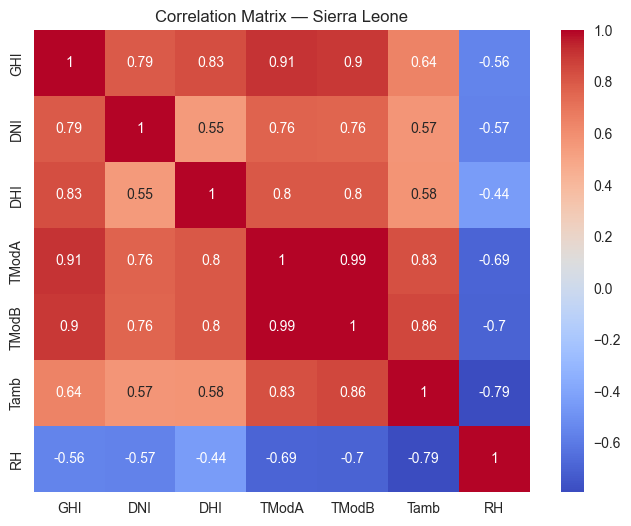

In [12]:
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix — Sierra Leone")
plt.show()


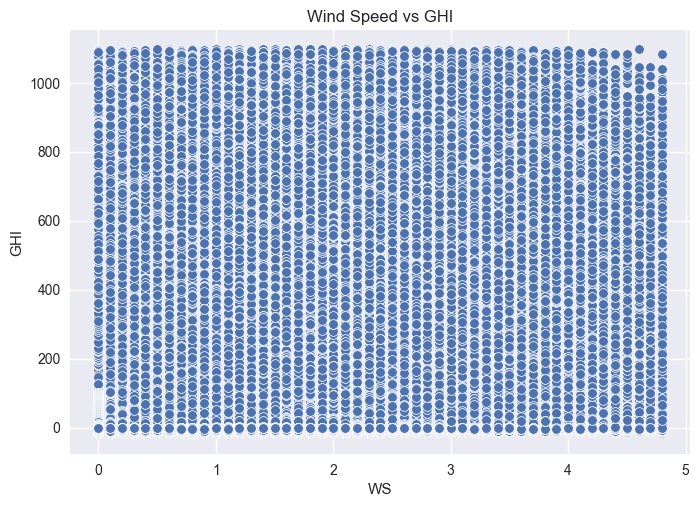

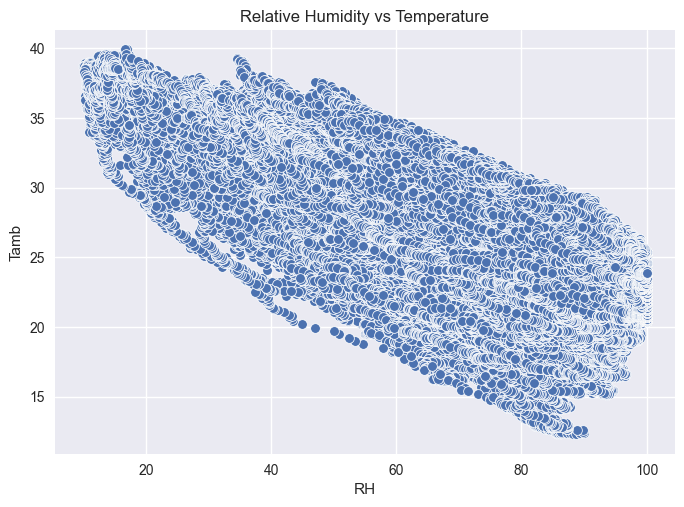

In [13]:
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Relative Humidity vs Temperature")
plt.show()


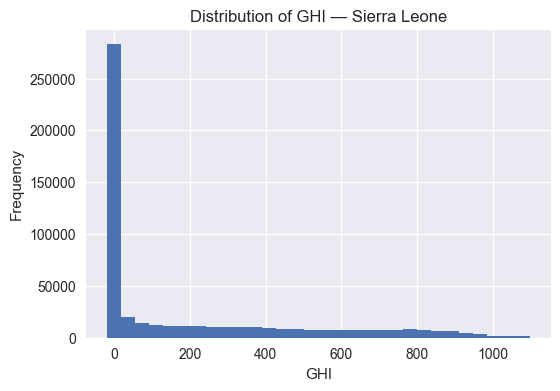

In [14]:
df['GHI'].hist(bins=30, figsize=(6,4))
plt.title("Distribution of GHI — Sierra Leone")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()


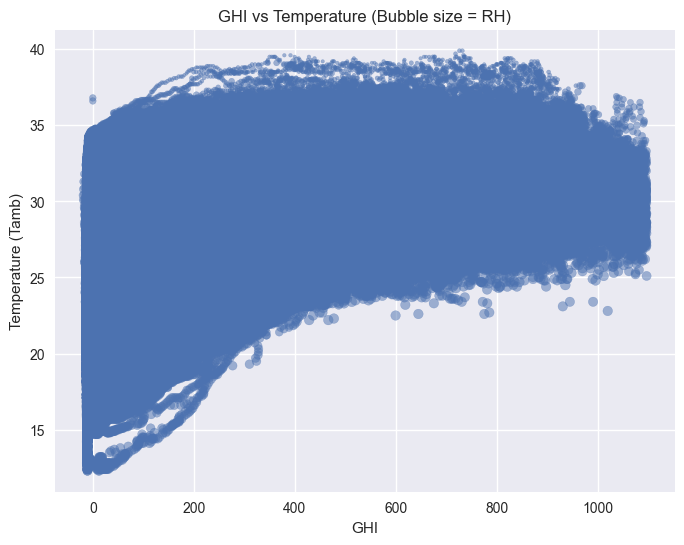

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*0.5, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.title('GHI vs Temperature (Bubble size = RH)')
plt.show()
